/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

RMSE:  96.9082413171411
MAPE:  2.219797213407509e+16


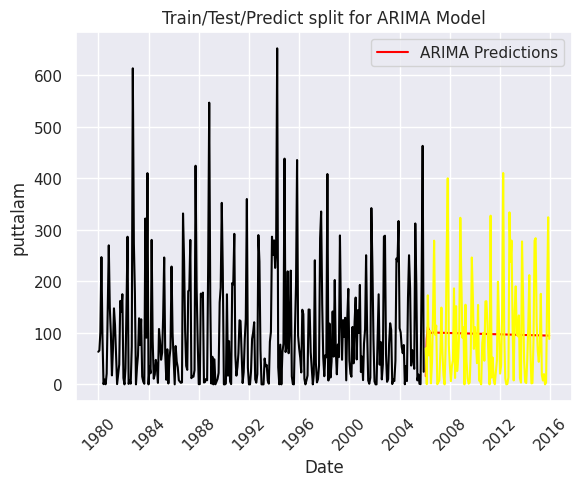

In [60]:
# Autoregressive Integrated Moving Average (ARIMA)

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import datetime
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# load data
weather = pd.read_csv("climatedatawithdate.csv")
weather.index = pd.to_datetime(weather['date'])

sns.set()

weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format

# split tran and test data
train = weather[weather['date'] < pd.to_datetime("1/1/2006")]
test = weather[weather['date'] > pd.to_datetime("1/1/2006")]

# plot the data
# plt.plot(train['date'], train['puttalam'], color="black")
# plt.plot(test['date'], test['puttalam'], color="red")
plt.ylabel('puttalam')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test/Predict split for ARIMA Model")
# plt.show()

# apply ARIMA model
y = train['puttalam']

ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 

# train to next month data
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

# plotting
plt.plot(y_pred_out, color='red', label = 'ARIMA Predictions')
plt.plot(train['date'], train['puttalam'], color="black")
plt.plot(test['date'], test['puttalam'], color="yellow")

plt.legend()

# calculate RMSE
arma_rmse = np.sqrt(mean_squared_error(test["puttalam"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test['puttalam'], y_pred_out)
print("MAPE: ",mape)

# order = (2, 2, 2) -> RMSE:  96.9082413171411 
